# Souper-duper predictive model

## Prepare data

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
def day2int(day: str):
    ''' Convert a day to an integer. '''
    days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    days = {day: idx for (idx, day) in enumerate(days)}
    return days.get(day.lower())
    
def month2int(month: str):
    ''' Convert a month to an integer. '''
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 
              'august', 'september', 'october', 'november', 'december']
    months = {month: idx for (idx, month) in enumerate(months)}
    return months.get(month.lower())

def season2int(season: str):
    ''' Convert a season to an integer. '''
    seasons = ['winter', 'spring', 'summer', 'autumn']
    seasons = {season: idx for (idx, season) in enumerate(seasons)}
    return seasons.get(season.lower())

def date2dayofyear(date: str):
    ''' Convert at date of the YYYY-MM-DD format
        to the day of the year. '''
    from calendar import monthrange
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:10])
    
    day_of_year = 0
    for m in range(1, month):
        day_of_year += monthrange(year, m)[1]
    day_of_year += day
    
    return day_of_year

In [60]:
# Just testing functions
day2int('Wednesday'), month2int('december'), season2int('AuTUMN'), date2dayofyear('2019-02-05')

(2, 11, 3, 36)

In [4]:
path = os.path.join('data', 'souper_with_events.csv')
soup = pd.read_csv(path, index_col = 0)
soup.head()

,date,locA,locB,total,month,day_of_week,day_of_month,season,event
0,2018-02-03,30,15,45,February,Saturday,3,Winter,0
1,2018-02-05,30,17,47,February,Monday,5,Winter,0
2,2018-02-24,25,9,34,February,Saturday,24,Winter,0
3,2018-03-03,30,15,45,March,Saturday,3,Spring,0
4,2018-03-05,30,12,42,March,Monday,5,Spring,0


In [5]:
path = os.path.join('data', 'weather_data_complete.csv')
weather = pd.read_csv(path)
weather.head()

,day,month,year,precip_intensity_max,precip_intensity_avg,precip_type,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity
0,3,2,2018,0.1336,0.0190,rain,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83
1,4,2,2018,0.0129,0.0005,rain,7.07,7.05,11.88,7.28,-3.10,-0.07,-1.50,-0.20,-3.27,0.76
2,5,2,2018,0.0000,0.0000,no_precip,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74
3,6,2,2018,0.0000,0.0000,no_precip,5.84,5.86,6.98,5.88,-5.55,-2.78,-4.15,-2.78,-5.11,0.74
4,7,2,2018,0.0000,0.0000,no_precip,3.62,3.65,5.26,3.74,-5.11,-0.01,-2.72,-0.01,-2.83,0.68


In [6]:
weather['date'] = weather['year'].astype(str) + '-' + \
                  weather['month'].astype(str).apply(lambda s: f'{s:0>2}') + '-' + \
                  weather['day'].astype(str).apply(lambda s: f'{s:0>2}')
weather = weather.drop(['month'], axis = 1)
weather.loc[:, 'day_of_year'] = weather.loc[:, 'date'].apply(date2dayofyear)
df = weather.merge(soup, on = 'date')
df.head()

,day,year,precip_intensity_max,precip_intensity_avg,precip_type,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,...,date,day_of_year,locA,locB,total,month,day_of_week,day_of_month,season,event
0,3,2018,0.1336,0.019,rain,3.27,3.25,10.24,4.03,0.18,...,2018-02-03,34,30,15,45,February,Saturday,3,Winter,0
1,5,2018,0.0000,0.000,no_precip,7.72,7.74,9.97,7.84,-4.58,...,2018-02-05,36,30,17,47,February,Monday,5,Winter,0
2,24,2018,0.0000,0.000,no_precip,8.92,8.92,12.12,8.92,-9.05,...,2018-02-24,55,25,9,34,February,Saturday,24,Winter,0
3,3,2018,0.1913,0.014,snow,5.05,5.08,11.21,5.79,-7.17,...,2018-03-03,62,30,15,45,March,Saturday,3,Spring,0
4,5,2018,0.0000,0.000,no_precip,4.75,4.76,6.02,4.81,-1.14,...,2018-03-05,64,30,12,42,March,Monday,5,Spring,0


In [7]:
variables = [
    'year',
    'month',
    'day_of_week',
    'day_of_month',
    'day_of_year',
    'season',
    'precip_intensity_max',
    'precip_intensity_avg',
    'wind_speed_max',
    'wind_speed_avg',
    'gust_max',
    'gust_avg',
    'temp_min',
    'temp_max',
    'temp_avg',
    'temp_day',
    'temp_night',
    'humidity',
    'event'
]

In [8]:
X = df[variables].copy()
y = df['total'].copy()
X.head()

,year,month,day_of_week,day_of_month,day_of_year,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event
0,2018,February,Saturday,3,34,Winter,0.1336,0.019,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0
1,2018,February,Monday,5,36,Winter,0.0000,0.000,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0
2,2018,February,Saturday,24,55,Winter,0.0000,0.000,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0
3,2018,March,Saturday,3,62,Spring,0.1913,0.014,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0
4,2018,March,Monday,5,64,Spring,0.0000,0.000,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0


In [9]:
X['day_of_week'] = X['day_of_week'].apply(day2int)
X['month'] = X['month'].apply(month2int)
X['season'] = X['season'].apply(season2int)
X.head()

,year,month,day_of_week,day_of_month,day_of_year,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event
0,2018,1,5,3,34,0,0.1336,0.019,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0
1,2018,1,0,5,36,0,0.0000,0.000,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0
2,2018,1,5,24,55,0,0.0000,0.000,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0
3,2018,2,5,3,62,1,0.1913,0.014,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0
4,2018,2,0,5,64,1,0.0000,0.000,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0


## Data analysis

In [10]:
from matplotlib import pyplot as plt

In [11]:
viz = X.copy()
viz['total'] = y
viz.head()

,year,month,day_of_week,day_of_month,day_of_year,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event,total
0,2018,1,5,3,34,0,0.1336,0.019,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0,45
1,2018,1,0,5,36,0,0.0000,0.000,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0,47
2,2018,1,5,24,55,0,0.0000,0.000,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0,34
3,2018,2,5,3,62,1,0.1913,0.014,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0,45
4,2018,2,0,5,64,1,0.0000,0.000,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0,42


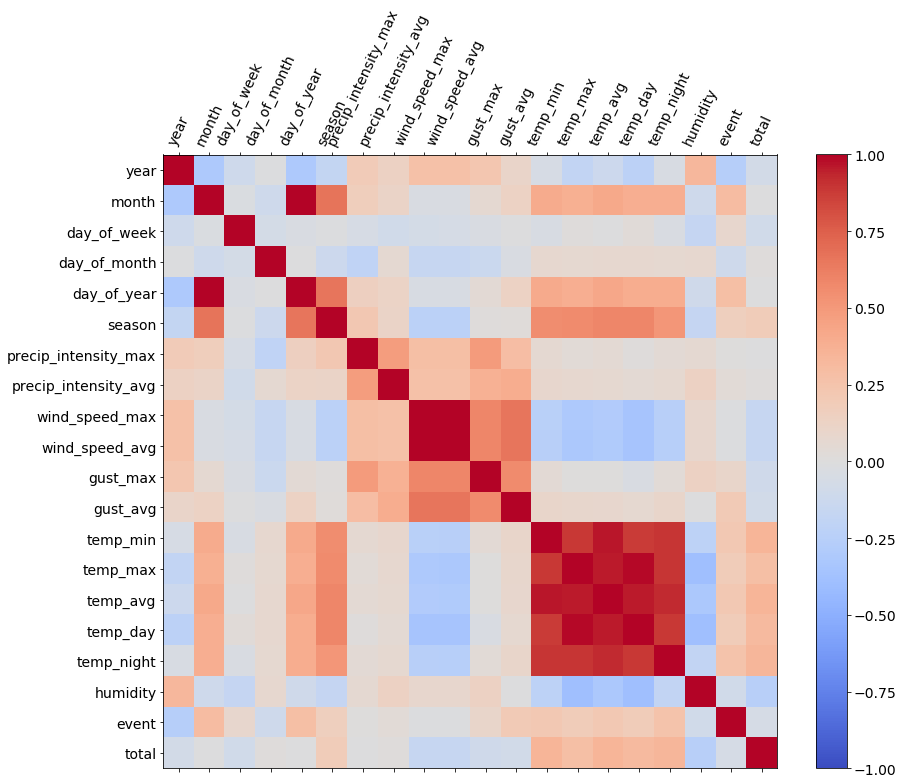

In [12]:
f = plt.figure(figsize = (14, 11))
plt.matshow(viz.corr(), fignum = f.number, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.xticks(range(viz.shape[1]), viz.columns, fontsize=14, rotation=65)
plt.yticks(range(viz.shape[1]), viz.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

## Model selection

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, svm, ensemble, neural_network

In [14]:
ml_viz = viz.copy()
ml_viz['date'] = ml_viz['year'].astype(str) + '-' + \
                 ml_viz['month'].astype(str).apply(lambda s: f'{s:0>2}') + '-' + \
                 ml_viz['day_of_month'].astype(str).apply(lambda s: f'{s:0>2}')
ml_viz.head()

,year,month,day_of_week,day_of_month,day_of_year,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,...,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event,total,date
0,2018,1,5,3,34,0,0.1336,0.019,3.27,3.25,...,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0,45,2018-01-03
1,2018,1,0,5,36,0,0.0000,0.000,7.72,7.74,...,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0,47,2018-01-05
2,2018,1,5,24,55,0,0.0000,0.000,8.92,8.92,...,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0,34,2018-01-24
3,2018,2,5,3,62,1,0.1913,0.014,5.05,5.08,...,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0,45,2018-02-03
4,2018,2,0,5,64,1,0.0000,0.000,4.75,4.76,...,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0,42,2018-02-05


In [15]:
train_idx = (ml_viz['year'] == 2018) | (ml_viz['month'] < 4) | \
               ((ml_viz['month'] == 4) & (ml_viz['day_of_month'] <= 20))
train, test = ml_viz[train_idx], ml_viz[~train_idx]
train.head()

,year,month,day_of_week,day_of_month,day_of_year,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,...,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event,total,date
0,2018,1,5,3,34,0,0.1336,0.019,3.27,3.25,...,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0,45,2018-01-03
1,2018,1,0,5,36,0,0.0000,0.000,7.72,7.74,...,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0,47,2018-01-05
2,2018,1,5,24,55,0,0.0000,0.000,8.92,8.92,...,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0,34,2018-01-24
3,2018,2,5,3,62,1,0.1913,0.014,5.05,5.08,...,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0,45,2018-02-03
4,2018,2,0,5,64,1,0.0000,0.000,4.75,4.76,...,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0,42,2018-02-05


In [34]:
def viz_model(model):
    from matplotlib import pyplot as plt
    
    model.fit(train[variables], train['total'])
    preds = test.copy()[variables]
    preds['total'] = [model.predict([preds.iloc[idx, :]])[0] for idx in range(len(preds))]
    preds['date'] = preds['year'].astype(str) + '-' + \
                    preds['month'].astype(str).apply(lambda s: f'{s:0>2}') + '-' + \
                    preds['day_of_month'].astype(str).apply(lambda s: f'{s:0>2}')
    preds = preds[['date', 'total']]
    plt.style.use('seaborn-ticks')
    
    fig, ax = plt.subplots(figsize = (15, 10))
    plt.plot(preds['date'], preds['total'], label = 'prediction', color = 'blue', linewidth = 2)
    plt.plot(test['date'], test['total'], label = 'true', color = 'grey', linewidth = 2)
    plt.legend(fontsize = 17)
    plt.xticks(rotation =  60)
    plt.title(f'Predictions - {model.__class__.__name__}', fontsize = 18)
    plt.show()
    
    plt.style.use('seaborn-ticks')
    fig, ax = plt.subplots(figsize = (15, 10))
    plt.bar(preds['date'], preds['total'] - test['total'])
    plt.title(f'Prediction error - {model.__class__.__name__}', fontsize = 18)
    plt.xticks(rotation = 60)
    plt.show()

### Linear regression

In [35]:
linreg = linear_model.LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
scores = -cross_val_score(linreg, X, y, cv = 10)
np.mean(scores), np.var(scores)

(1.786862450846409, 17.95608404661017)

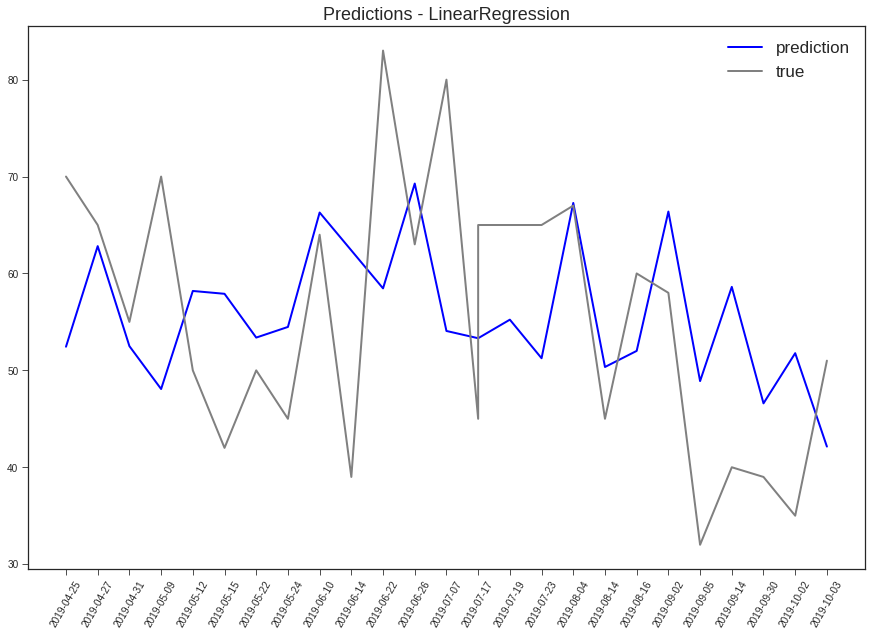

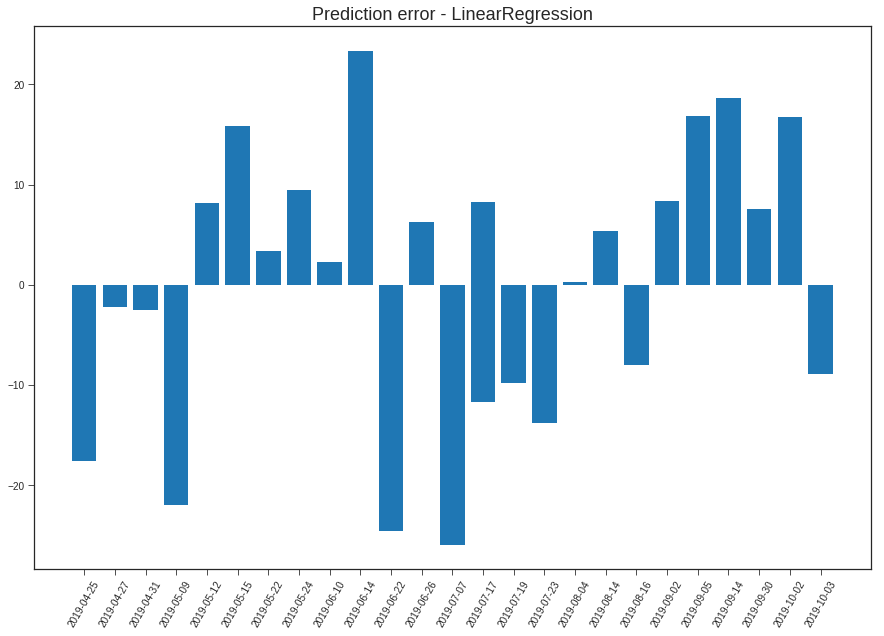

In [37]:
viz_model(linreg)

### Ridge regression

In [44]:
ridge = linear_model.Ridge(alpha = 50)
ridge.fit(X, y)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [45]:
scores = -cross_val_score(ridge, X, y, cv = 10)
np.mean(scores), np.var(scores)

(0.9445876343817361, 2.375575580704106)

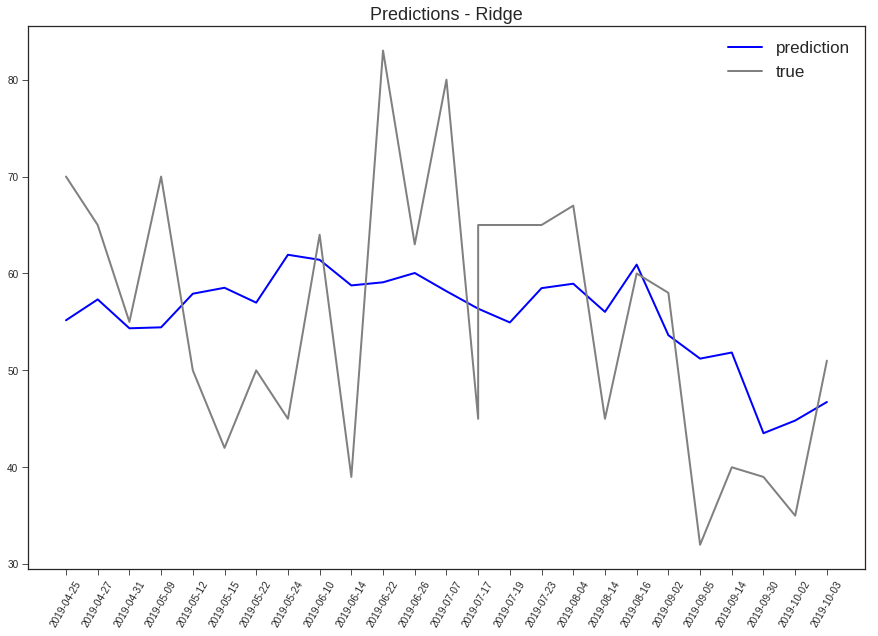

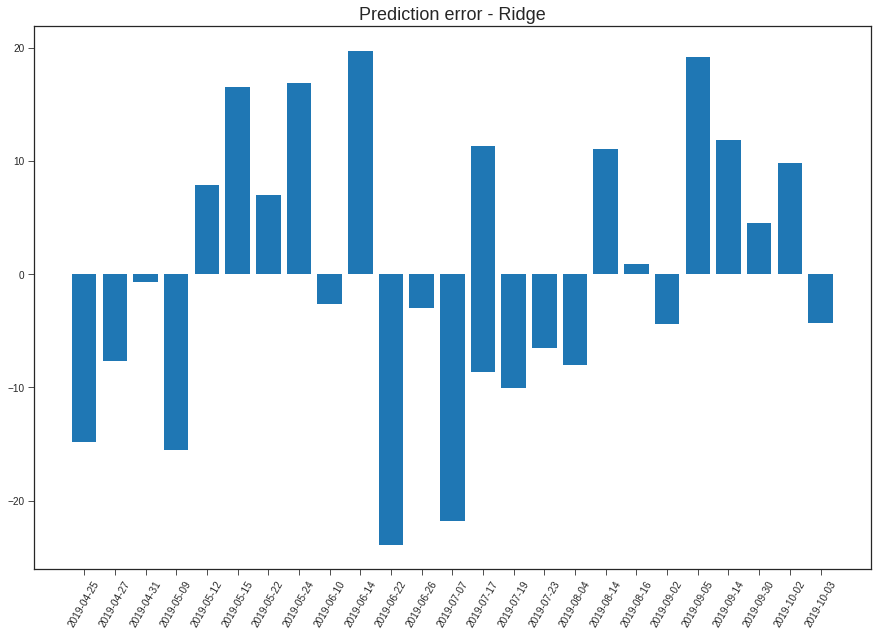

In [46]:
viz_model(ridge)

### Support vector machine

In [47]:
sv = svm.SVR(C = 1, gamma = 1, kernel = 'rbf')
sv.fit(X, y)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [48]:
scores = -cross_val_score(sv, X, y, cv = 10)
np.mean(scores), np.var(scores)

(0.7360432847786345, 0.6988873320862303)

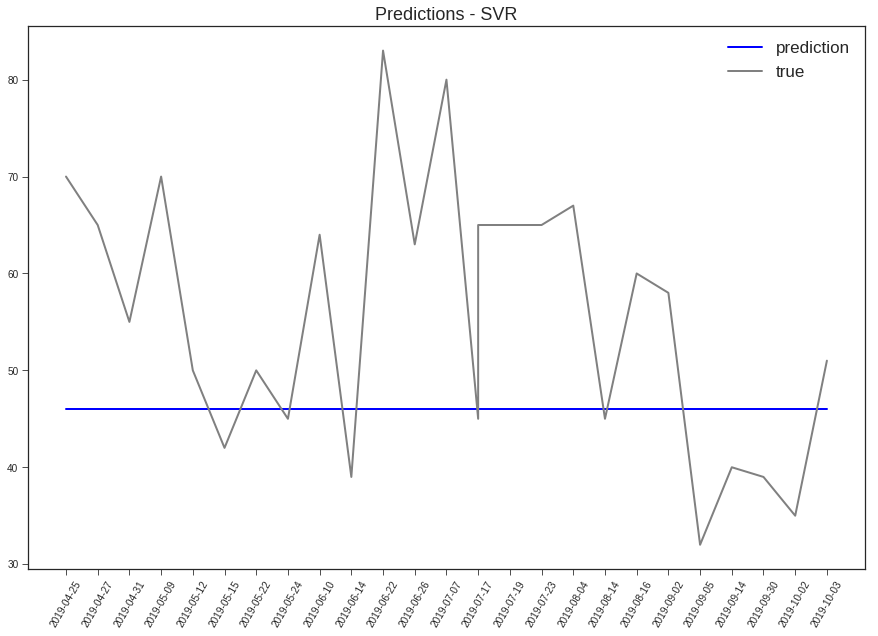

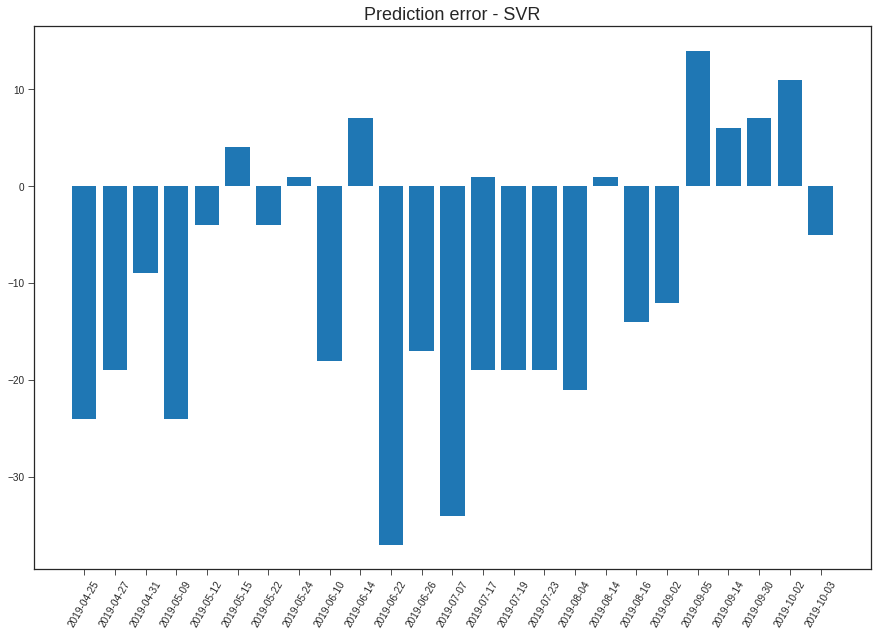

In [49]:
viz_model(sv)

### Random forest

In [50]:
forest = ensemble.RandomForestRegressor(n_estimators = 100)
forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
scores = -cross_val_score(forest, X, y, cv = 10)
np.mean(scores), np.var(scores)

(0.28978204130413043, 0.26718186414004014)

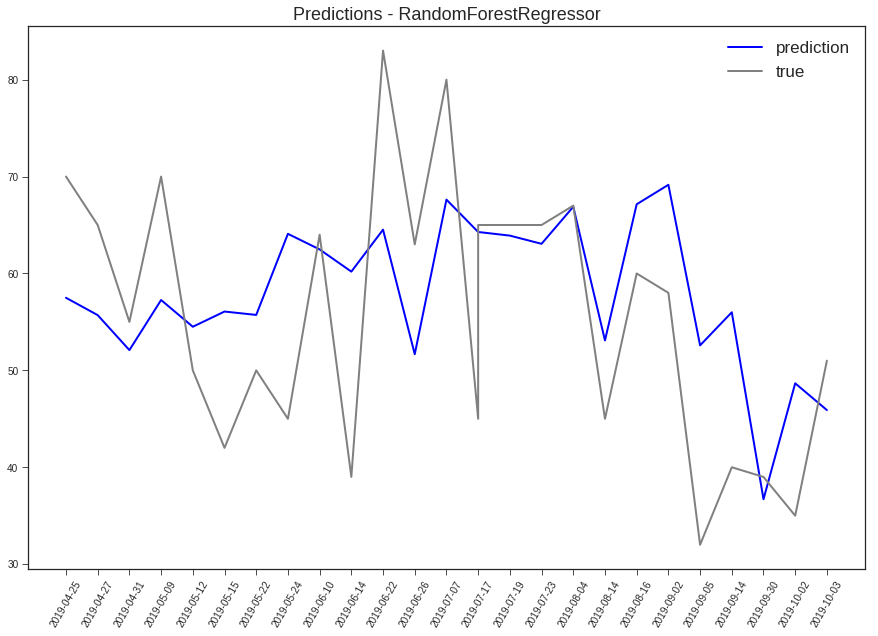

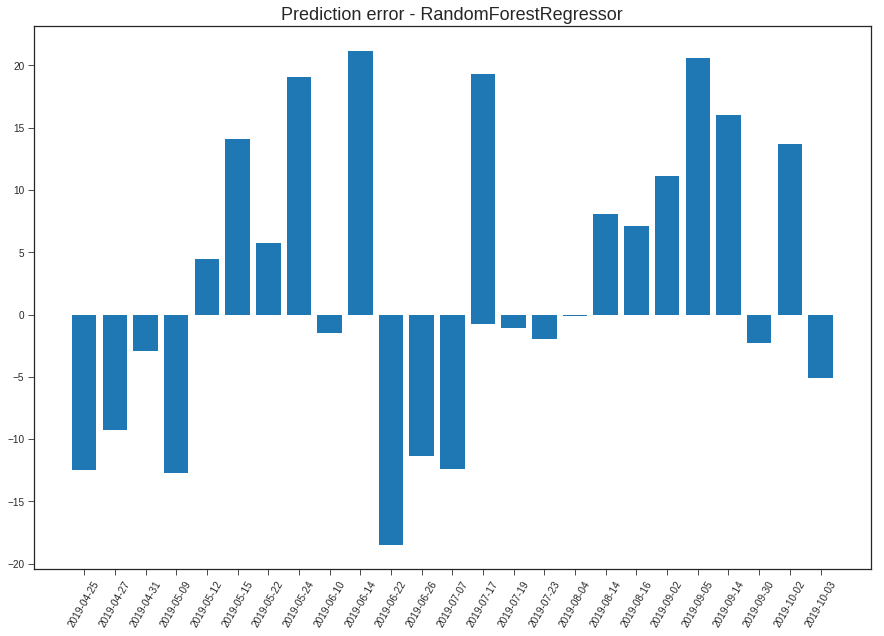

In [52]:
viz_model(forest)

In [53]:
feat_imps = dict(list(zip(forest.feature_importances_, X.columns)))
[(feat_imps[i], i) for i in sorted(feat_imps, reverse = True)]

[('day_of_year', 0.1353973005273301),
 ('temp_min', 0.13110051599779857),
 ('gust_avg', 0.08207591585335307),
 ('humidity', 0.07688449019487029),
 ('day_of_week', 0.06805828456457),
 ('temp_night', 0.06272421794800907),
 ('temp_avg', 0.055750171636496045),
 ('day_of_month', 0.05479512220938483),
 ('season', 0.051791649280165185),
 ('gust_max', 0.047848223378921965),
 ('temp_day', 0.04655087450276322),
 ('precip_intensity_avg', 0.03842031373325576),
 ('wind_speed_max', 0.03468686220662365),
 ('temp_max', 0.03135192779540042),
 ('wind_speed_avg', 0.02762129924779927),
 ('precip_intensity_max', 0.021452106534990214),
 ('month', 0.02101154108460683),
 ('event', 0.010169613120212662),
 ('year', 0.002309570183448804)]

### Multilayered Perceptron

In [54]:
nn = neural_network.MLPRegressor(max_iter = 2000, alpha = 3e-4, hidden_layer_sizes = (64,),
                                early_stopping = True)
nn.fit(X, y)

MLPRegressor(activation='relu', alpha=0.0003, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(64,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [55]:
scores = -cross_val_score(nn, X, y, cv = 10)
np.mean(scores), np.var(scores)

(1.8799778151037683, 3.079651283061053)

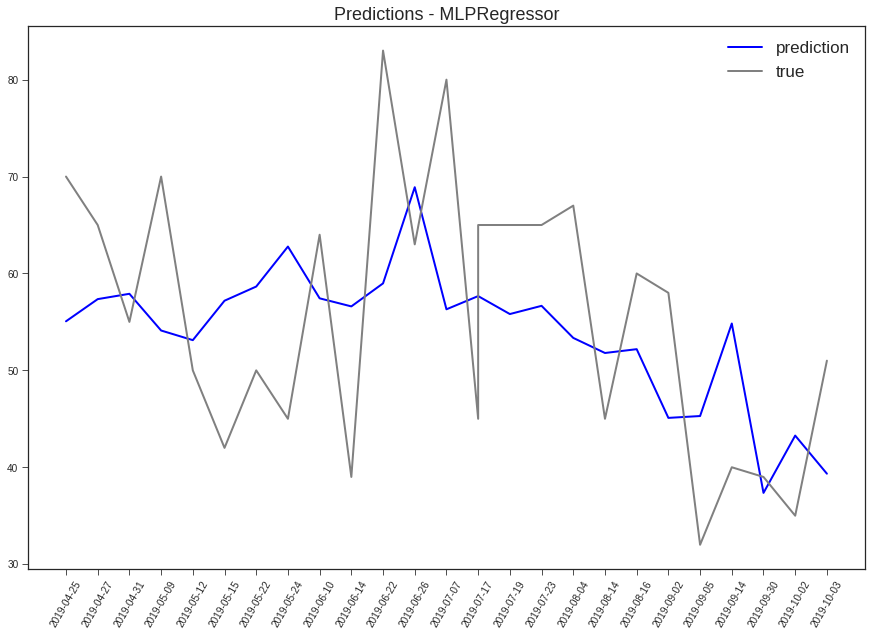

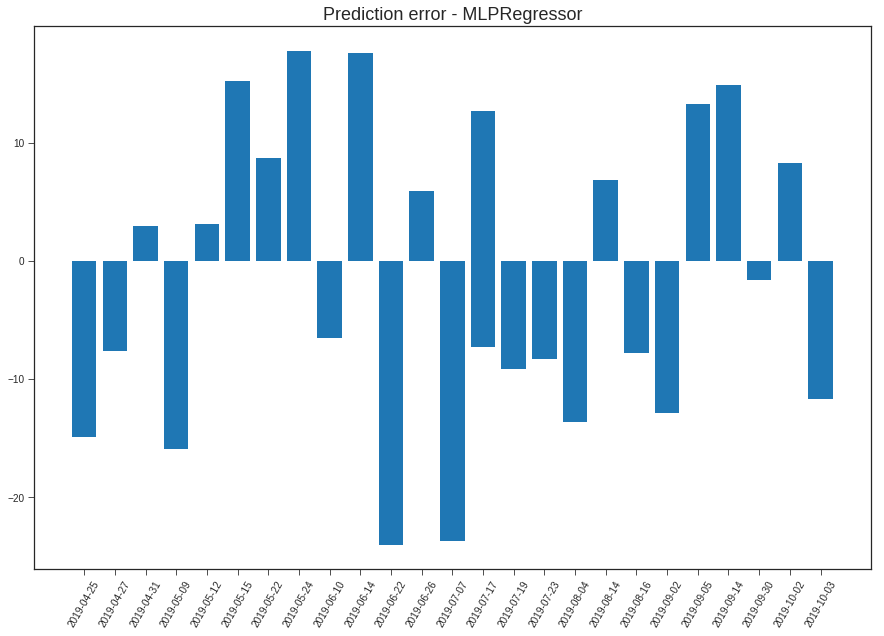

In [57]:
viz_model(nn)